# 대중 교통 분석

1. 지하철 승하차 인원
2. 유임/무임승차 비교

### https://www.t-money.co.kr

티머니 홈페이지 -> 이용안내 -> 대중교통 통계자료 -> 분석할 자료(월) 선택 : Excel

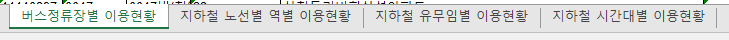

# 실습 : 지하철 유무임별 이용현황

- 무임 : 만 65세 이상의 데이터를 의미한다.

In [1]:
import csv

f = open('subwayfree.csv')
data = csv.reader(f)

for row in data :
    print(row)

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2021-09', '1호선', '1', '서울역', '803,949', '777,637', '149,599', '142,668']
['2021-09', '1호선', '10', '동묘앞', '110,303', '118,964', '139,466', '140,250']
['2021-09', '1호선', '2', '시청', '393,433', '394,568', '56,200', '55,017']
['2021-09', '1호선', '3', '종각', '600,610', '583,385', '99,437', '93,411']
['2021-09', '1호선', '4', '종로3가', '356,925', '320,272', '244,633', '229,243']
['2021-09', '1호선', '5', '종로5가', '298,511', '303,620', '218,858', '211,256']
['2021-09', '1호선', '6', '동대문', '189,028', '177,072', '102,747', '100,906']
['2021-09', '1호선', '7', '신설동', '229,020', '224,923', '100,016', '96,595']
['2021-09', '1호선', '8', '제기동', '197,782', '192,380', '244,303', '264,653']
['2021-09', '1호선', '9', '청량리(서울시립대입구)', '273,889', '271,624', '233,762', '239,320']
['2021-09', '2호선', '11', '시청', '418,259', '401,158', '38,544', '35,071']
['2021-09', '2호선', '12', '을지로입구', '731,561', '745,847', '73,238', '68,916']
['2021-09', '2호선', '13', '을지로3가', 

### 숫자 데이터에 들어있는 천단위 콤마기호 제거

- 천단위 기호는 숫자자료가 있는 인덱스 4번부터 끝까지에만 해당된다.

In [2]:
row[4] = int(row[4].replace(',', ''))

In [3]:
print(row[4])

30358


- 데이터 자료형을 반복문을 이용하여 작업한다.
- 헤더는 넘어간다 -> next()

In [ ]:
import csv

f = open('subwayfree.csv')
data = csv.reader(f)
next(data)

for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i].replace(',', ''))
    print(row)

### 유임승차 비율이 가장 높은 역

#### 조건 : 10명은 유임승차, 4명은 무임승차 10/4 = 2.5

rate = 유임승차인원 / 무임승차인원

### 작업순서

1. 데이터를 읽어온다.
2. 각 역의 rate(유임승차비율)을 계산한다. -> rate
3. 비율이 가장 높은 역을 찾는다. -> max()
4. 출력한다.

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']

In [11]:
import csv

f = open('subwayfree.csv')
data = csv.reader(f)
next(data)                  # 헤더를 건너뛴다.

rate = 0                    # 유임비율
mx = 0                      # 최대 유임승차 비율

for row in data : 
    for i in range(4, 8) :
        row[i] = int(row[i].replace(',', ''))
    
    if row[6] > 0 :
        rate = row[4] / row[6]
    
    if rate > mx :
        mx = rate
        
print(mx)

38.0


#### 0은 나누기 연산을 할 수 없다 라는 에러가 발생함

- row[4] : 유임승차는 0을 사용할 수 있다.
- row[6] : 무임승차는 나누기 대상이므로 0을 사용할 수 없다.

#### row[6] == 0 에 해당하는 값들을 출력한다.

In [16]:
import csv

f = open('subwayfree.csv')
data = csv.reader(f)
next(data)                  # 헤더를 건너뛴다.

rate = 0                    # 유임비율
mx = 0                      # 최대 유임승차 비율

for row in data : 
    for i in range(4, 8) :
        row[i] = int(row[i].replace(',', ''))
    
    if row[6] > 0 :
        rate = row[4] / row[6]
    
    if rate > mx :
        mx = rate
        
        print(row, round(rate, 2))
        
print(mx)

['2021-09', '1호선', '1', '서울역', 803949, 777637, 149599, 142668] 5.37
['2021-09', '1호선', '2', '시청', 393433, 394568, 56200, 55017] 7.0
['2021-09', '2호선', '11', '시청', 418259, 401158, 38544, 35071] 10.85
['2021-09', '2호선', '19', '한양대', 136543, 141268, 9756, 10127] 14.0
['2021-09', '2호선', '49', '홍대입구', 1198670, 1254403, 78094, 74544] 15.35
['2021-09', '경부선', '121', '서울역', 132140, 42217, 7863, 1906] 16.81
['2021-09', '6호선', '445', '연신내', 38, 0, 1, 0] 38.0
38.0


## 실습2 : 전체 인원대비 유임승차 비율

rate = 유임승차인원 / 전체승차인원(유임승차인원 + 무임승차인원)

지하철역 이름 입력 : 서현
유입:  470195
무임:  93946


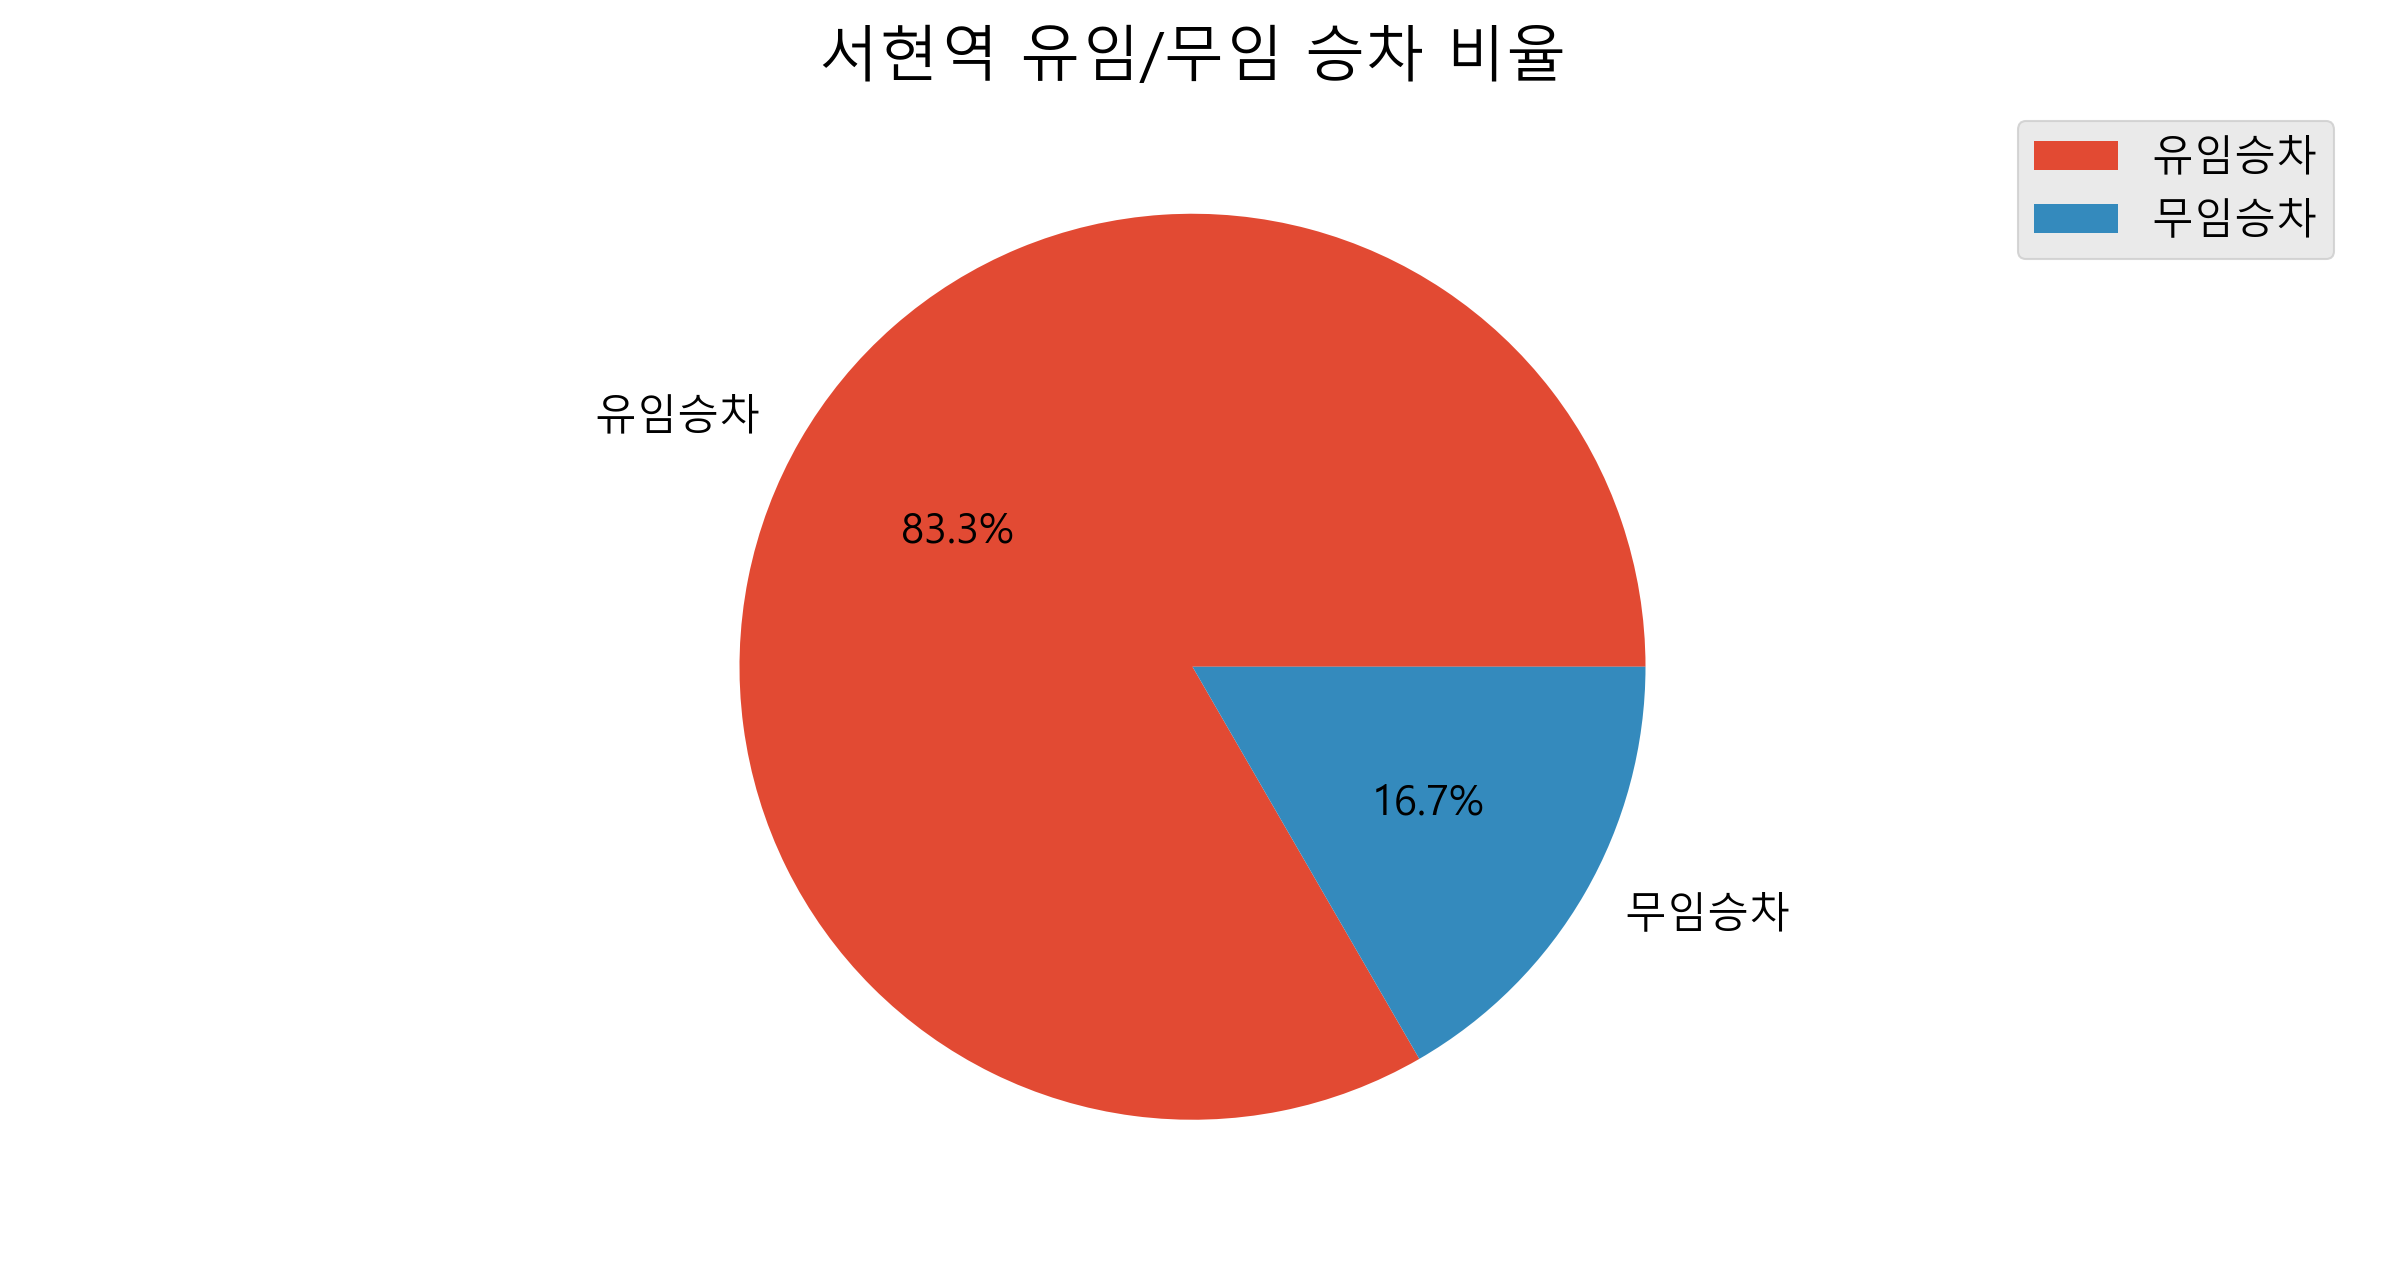

In [23]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfree.csv')
data = csv.reader(f)

pay = 0
free = 0

name = input('지하철역 이름 입력 : ')

for row in data :
    if name == row[3] :
        pay = int(row[4].replace(',', ''))
        free = int(row[6].replace(',', ''))
        break

print('유입: ', pay)
print('무임: ', free)
            
# ------------------------------------------------------------------------


plt.style.use('ggplot')
plt.figure(figsize=(10, 5), dpi = 300)        # 그래프 크기 선택(inch)

plt.rc('font', family='Malgun Gothic')        # 맥 : Apple gothic  : 한글깨짐 방지
plt.rcParams['axes.unicode_minus'] = False   # - 기호 깨짐 방지

plt.title(name + '역 유임/무임 승차 비율')


size = [pay, free]
label = ['유임승차', '무임승차']

plt.axis('equal')

plt.pie(size, labels = label, autopct = '%.1f%%')   # 소수 1자리를 %기호를 붙여서 출력한다.
plt.legend()
plt.show()

In [24]:
import csv

f = open('subwayfree.csv')
data = csv.reader(f)
next(data)                  # 헤더를 건너뛴다.

rate = 0                    # 유임비율
mx = 0                      # 최대 유임승차 비율

for row in data : 
    for i in range(4, 8) :
        row[i] = int(row[i].replace(',', ''))
    
    if row[6] > 0 :
        rate = row[4] / (row[4] + row[6])
    
    if rate > mx :
        mx = rate
        
        print(row, round(rate, 2))
        
print(mx)

['2021-09', '1호선', '1', '서울역', 803949, 777637, 149599, 142668] 0.84
['2021-09', '1호선', '2', '시청', 393433, 394568, 56200, 55017] 0.88
['2021-09', '2호선', '11', '시청', 418259, 401158, 38544, 35071] 0.92
['2021-09', '2호선', '19', '한양대', 136543, 141268, 9756, 10127] 0.93
['2021-09', '2호선', '49', '홍대입구', 1198670, 1254403, 78094, 74544] 0.94
['2021-09', '경부선', '121', '서울역', 132140, 42217, 7863, 1906] 0.94
['2021-09', '6호선', '445', '연신내', 38, 0, 1, 0] 0.97
0.9743589743589743


In [25]:
import csv

f = open('subwayfree.csv')
data = csv.reader(f)
next(data)                  # 헤더를 건너뛴다.

rate = 0                    # 유임비율
mx = 0                      # 최대 유임승차 비율

for row in data : 
    for i in range(4, 8) :
        row[i] = int(row[i].replace(',', ''))
    
    if row[6] != 0 and (row[4] + row[6]) > 100000 :   # 승차인원 10만명이상
        rate = row[4] / (row[4] + row[6])
    
    if rate > mx :
        mx = rate
        
        print(row, round(rate, 2))
        
print(mx)

['2021-09', '1호선', '1', '서울역', 803949, 777637, 149599, 142668] 0.84
['2021-09', '1호선', '2', '시청', 393433, 394568, 56200, 55017] 0.88
['2021-09', '2호선', '11', '시청', 418259, 401158, 38544, 35071] 0.92
['2021-09', '2호선', '19', '한양대', 136543, 141268, 9756, 10127] 0.93
['2021-09', '2호선', '49', '홍대입구', 1198670, 1254403, 78094, 74544] 0.94
['2021-09', '경부선', '121', '서울역', 132140, 42217, 7863, 1906] 0.94
0.9438369177803333


In [27]:
import csv

f = open('subwayfree.csv')
data = csv.reader(f)
next(data)                  # 헤더를 건너뛴다.

rate = 0                    # 유임비율
mx = 0                      # 최대 유임승차 비율

for row in data : 
    for i in range(4, 8) :
        row[i] = int(row[i].replace(',', ''))
    
    if row[6] != 0 and (row[4] + row[6]) > 100000 :   # 승차인원 10만명이상
        rate = row[4] / (row[4] + row[6])
    
    if rate > mx :
        mx = rate
        mx_station = row[3] + ' ' + row[1]   # 역이름: 몇호선
        
print(mx_station, round(mx * 100, 2), '%')

서울역 경부선 94.38 %


# 유무임 승하차 인원이 가장 많은 역

### 작업순서

1. 데이터를 읽어들인다.
2. 모든역에 승차인원(유임[4]/무임[6]), 하차인원(유임[5]/무임[7])을 찾는다.
    - 유임승차 최고역
    - 유임하차 최고역
    - 무임승차 최고역
    - 무임하차 최고역
    - 전체 승/하차 최고역
3. 최고 빈도수 역이름을 데이터값과 함께 출력한다.

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']

In [32]:
import csv

f = open('subwayfree.csv')
data = csv.reader(f)
next(data)                  # 헤더를 건너뛴다.

max_pay_up = 0
max_pay_down = 0
max_free_up = 0
max_free_down = 0

for row in data : 
    for i in range(4, 8) :
        row[i] = int(row[i].replace(',', ''))
        
    if row[4] > max_pay_up :
        max_pay_up = row[4]
        max_pay_up_station = row[3]

    if row[5] > max_pay_down :
        max_pay_down = row[5]
        max_pay_down_station = row[3]

    if row[6] > max_free_up :
        max_free_up = row[6]
        max_free_up_station = row[3]

    if row[7] > max_free_down :
        max_free_down = row[7]
        max_free_down_station = row[3]


print(max_pay_up_station, max_pay_up)
print(max_pay_down_station, max_pay_down)
print(max_free_up_station, max_free_up)
print(max_free_down_station, max_free_down)

강남 1665279
강남 1635626
종로3가 244633
제기동 264653


In [37]:
import csv

f = open('subwayfree.csv')
data = csv.reader(f)
next(data)                  # 헤더를 건너뛴다.

mx = [0] * 4
mx_station = [''] * 4
label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data : 
    for i in range(4, 8) :
        row[i] = int(row[i].replace(',', ''))
        
        if row[i] > mx[i-4] :
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]
            
for i in range(4) :
    print(label[i] + ' : ' +mx_station[i], mx[i])



유임승차 : 강남 2호선 1665279
유임하차 : 강남 2호선 1635626
무임승차 : 종로3가 1호선 244633
무임하차 : 제기동 1호선 264653


#### 유임 승차 인원 : 강남 2호선 1665279
#### 유임 하차 인원 : 강남 2호선 1635626
#### 무임 승차 인원 : 종로3가 1호선 244633
#### 무임 하차 인원 : 제기동 1호선 264653

# 실습 : 모든역의 유무임 승하차 비율 그래프

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfree.csv')
data = csv.reader(f)
next(data)

# 이미지를 저장할 폴더를 지정
folder = './img/'

label = ['유임승차', '유임하차', '무임승차', '무임하차']
color = ['red', 'blue', 'green', 'orange']

plt.rc('font', family = 'Malgun Gothic')

for row in data : 
    for i in range(4, 8):
        row[i] = int(row[i].replace(',', ''))

    plt.figure(dpi = 300)
    plt.title(row[3] + ' ' + row[1])
    plt.pie(row[4:8], labels = label, colors = color, autopct = '%1.f%%')
    plt.axis('equal')
    plt.savefig(folder + row[3] + ' ' + row[1] + '.png')
    plt.show()

그래프를 파일로 저장할 경우  --->  plt.savefig('파일명.png')

# 지하철 시간대별 데이터 시각화

1. 출근시간대별 승하차 인원이 가장 많은 역
2. 지하철 시간대별 승하차 인원이 가장 많은 역

In [ ]:
import csv

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)

for row in data :
    print(row)

- 주의사항 : 헤더가 2개이므로 next() 함수를 2번 사용한다.

In [ ]:
import csv

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

for row in data :       
    row[4:] = map(int, row[4:])
    print(row)

### map(int, row[4:])

    - 첫번째는 정수형 함수를
    - 두번째는 csv 파일에서 불러온 데이터가 저장된 row의 인덱스를 지정하여 그룹으로 묶어서 

### 출근시간대 승하차 인원이 많은 역 : 7시 기준

In [52]:
import csv

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = []

for row in data :       
    row[4:] = map(int, row[4:])
    result.append(row[10])
    
print(len(row))

52


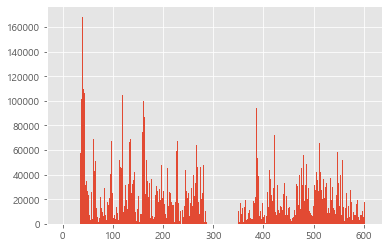

In [53]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = []

for row in data :       
    row[4:] = map(int, row[4:])
    result.append(row[10])
    
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

- 데이터를 오름차순 정렬하여 시각화

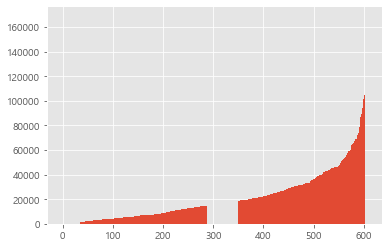

In [54]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = []

for row in data :       
    row[4:] = map(int, row[4:])
    result.append(row[10])
    
result.sort()            # 데이터를 오름차순으로 정렬한다.
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

# 출근시간대 : 7시 ~ 9시

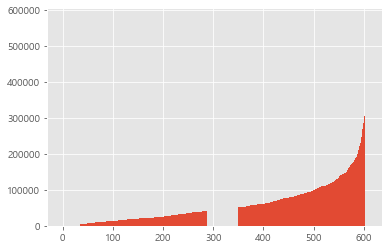

In [55]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = []

for row in data :       
    row[4:] = map(int, row[4:])
    result.append(sum(row[10:15:2]))    # 10부터 15까지 2씩 올린다: 10, 12, 14
    
result.sort()            # 데이터를 오름차순으로 정렬한다.
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

- 최대값과 역이름이 출력되게 수정

In [57]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

for row in data :       
    row[4:] = map(int, row[4:])
    
    if sum(row[10:15:2]) > mx :
        mx = sum(row[10:15:2])         # 10부터 15까지 2씩 올린다: 10, 12, 14
        mx_station = row[3] + '(' + row[1] + ')'
    
    
print(mx_station, mx)

신림(2호선) 575651


## 출근시간대 하차인원이 가장 많은 역 : 회사가 많다

In [60]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

for row in data :       
    row[4:] = map(int, row[4:])
    
    out = row[11:16:2]  # 11부터 16까지 2씩 올린다: 11, 13, 15
    
    if sum(out) > mx :
        mx = sum(out)         
        mx_station = row[3] + '(' + row[1] + ')'
    
    
print('출근시간대 하차인원 최다역 : ', mx_station, mx)

출근시간대 하차인원 최다역 :  강남(2호선) 628210


## 저녁 6시에 승차인원이 가장 많은 역

i = 4 + (t - 4) * 2
- 4시는 인덱스가 4이다.

-    시간   인덱스
-     4시     4
-     5시     6
-     6시     8

In [61]:
4 + (18-4)*2

32

In [70]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

t = int(input('시간 입력 : '))

for row in data :       
    row[4:] = map(int, row[4:])
    
    out = row[2 * t - 4]
    
    if out > mx :
        mx = out         
        mx_station = row[3] + '(' + row[1] + ')'
    
    
print('6시 승차인원 최다역 : ', mx_station, mx)

시간 입력 : 0
6시 승차인원 최다역 :  뚝섬(2호선) 2


In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

t = int(input('시간 입력 : '))

for row in data :       
    row[4:] = map(int, row[4:])
    
    out = row[4 + (t - 4) * 2]
    
    if out > mx :
        mx = out         
        mx_station = row[3] + '(' + row[1] + ')'
    
    
print('6시 승차인원 최다역 : ', mx_station, mx)

## 시간대별로 사람들이 가장 많이 승차/하차한 역은?

- 시간대별로 구분하기 위해서 24로 나눈다

In [ ]:
시간대(j)    인덱스(i)

0            4
1            6
2            8

## i = j * 2 + 4

In [71]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = [0] * 24
mx_station = [''] * 24

for row in data:
    row[4:] = map(int, row[4:])
    
    for j in range(24) :
        t = row[j * 2 + 4]
        
        if t > mx[j] :
            mx[j] = t
            mx_station[j] = row[3]
            
print(mx_station)
print(mx)

['구로', '신림', '신림', '신림', '신림', '신림', '신림', '신림', '신림', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '홍대입구', '의정부', '뚝섬', '뚝섬', '인천']
[9814, 34898, 64964, 168457, 254138, 153056, 83880, 71374, 75531, 83627, 94010, 115131, 131046, 198762, 275982, 168626, 130958, 157792, 121752, 15185, 259, 6, 2, 1]


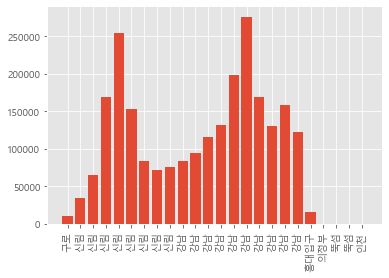

In [73]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.bar(range(24), mx)
plt.xticks(range(24), mx_station, rotation = 90)
plt.show()